# **Analyse de la Satisfaction Voyageur - Airbnb Paris**

_Notebook rédigé par Zaïnab SANI, le 8/12/2025_

## Introduction 

Dans ce projet, nous allons explorer une base de données réelle provenant d'**Airbnb**. Notre objectif initial était d'analyser le marché locatif dans son ensemble. Cependant, après une première inspection des données, nous avons constaté que les informations sur les prix étaient manquantes ou inexploitables.

Nous avons donc décidé de pivoter notre analyse pour nous concentrer sur un paramètre essentiel : **l'expérience client**. Notre problématique est la suivante : 

**Quels sont les quartiers parisiens qui offrent la meilleure satisfaction aux voyageurs, et la localisation géographique influence-t-elle la qualité du séjour ?**

### _Origine des données_

Le jeu de données utilisé (`listings.csv.gz`) provient de **Inside Airbnb**, une source indépendante qui scrape et nettoie les données publiques d'Airbnb.
* **Source :** [Inside Airbnb](https://insideairbnb.com/fr/get-the-data/)
* **Ville :** Paris, France
* **Date du scrape :** 12 Septembre 2025 

### _Note_
Ce notebook est un **projet éducatif**. Il sert de terrain d'expérimentation pour apprendre Pandas et la Data Visualization.

Il est **évolutif** : le code et les analyses sont sujets à modification au fur et à mesure de mon apprentissage. 

## 1\. Importation et Chargement

*Commençons par charger les outils nécessaires et nos données brutes.*


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot') 

airbnb = pd.read_csv('listings.csv.gz')
print("--- APERÇU DE LA BASE DE DONNÉES ---")
airbnb.head()

--- APERÇU DE LA BASE DE DONNÉES ---


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2719440,https://www.airbnb.com/rooms/2719440,20250912034503,2025-09-12,previous scrape,Nice flat close to Montparnasse,This beautiful apartment is very well located ...,"The neighborhood is very nice, feel free to sh...",https://a0.muscache.com/pictures/295786e7-116c...,13915159,...,4.94,4.86,4.73,7510702406383,f,1,1,0,0,0.57
1,2721397,https://www.airbnb.com/rooms/2721397,20250912034503,2025-09-12,previous scrape,"Marais - Charming loft, river view","In the heart of historical Paris le Marais, gr...",Le Marais is the heart of Paris. Few years ago...,https://a0.muscache.com/pictures/de55313f-9b4b...,13925876,...,4.95,4.91,4.85,7510400455677,f,1,1,0,0,0.66
2,2726092,https://www.airbnb.com/rooms/2726092,20250912034503,2025-09-12,previous scrape,Superbe 2 pièces idéalement placé,A stone's throw from Parc Monceau and the Arc ...,Quiet and residential area... Close to the Bat...,https://a0.muscache.com/pictures/6d6c4bc6-9473...,13612373,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
3,2726327,https://www.airbnb.com/rooms/2726327,20250912034503,2025-09-12,previous scrape,"Cozy place, Sacré Coeur Montmartre in the SoPi",Cozy apartment close to everything.<br />Perfe...,One of the most trendy corners of the capital ...,https://a0.muscache.com/pictures/6b569382-aed7...,7483725,...,4.97,4.92,4.67,7510901014972,f,1,1,0,0,0.72
4,2727929,https://www.airbnb.com/rooms/2727929,20250912034503,2025-09-12,previous scrape,Appartement d'architecte - Montmartre,"Our apartment, refurbished by an architect in ...",The apartment is in the heart of Paris's 18th ...,https://a0.muscache.com/pictures/miso/Hosting-...,13960346,...,5.00,4.57,5.00,7511808333770,f,1,1,0,0,0.25


## 2. Exploration des Données (EDA)

*Avant d'analyser quoi que ce soit, nous inspectons le fichier. L'objectif est de vérifier le format des colonnes, de repérer s'il manque des données et de regarder les statistiques de base.*


In [2]:
print("--- INFOS GÉNÉRALES ---")
airbnb.info()

--- INFOS GÉNÉRALES ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81853 entries, 0 to 81852
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            81853 non-null  int64  
 1   listing_url                                   81853 non-null  object 
 2   scrape_id                                     81853 non-null  int64  
 3   last_scraped                                  81853 non-null  object 
 4   source                                        81853 non-null  object 
 5   name                                          81853 non-null  object 
 6   description                                   79140 non-null  object 
 7   neighborhood_overview                         39600 non-null  object 
 8   picture_url                                   81851 non-null  object 
 9   host_id                              

In [3]:
print("--- STATISTIQUES ---")
airbnb.describe()

--- STATISTIQUES ---


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,8.185300e+04,8.185300e+04,8.185300e+04,81833.000000,81833.000000,0.0,81853.000000,81853.000000,81853.000000,0.0,...,63885.000000,63875.000000,63884.000000,63876.000000,63875.000000,81853.000000,81853.000000,81853.000000,81853.000000,63893.000000
mean,6.474769e+17,2.025091e+13,1.881639e+08,30.160217,39.745164,NaN,48.863980,2.343040,3.221788,NaN,...,4.668076,4.817172,4.835650,4.822042,4.633288,23.151247,21.924621,1.101975,0.014941,1.033034
std,5.533184e+17,0.000000e+00,2.105173e+08,116.081728,155.466214,NaN,0.018126,0.034218,1.684614,NaN,...,0.438274,0.350354,0.350983,0.303881,0.427163,92.452024,90.747158,10.075970,0.264369,1.339275
min,3.109000e+03,2.025091e+13,2.626000e+03,0.000000,0.000000,NaN,48.816090,2.229896,1.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.124670e+07,2.025091e+13,1.932200e+07,1.000000,1.000000,NaN,48.850640,2.320818,2.000000,NaN,...,4.540000,4.780000,4.810000,4.770000,4.500000,1.000000,1.000000,0.000000,0.000000,0.180000
50%,8.417510e+17,2.025091e+13,7.426650e+07,1.000000,2.000000,NaN,48.865240,2.346850,3.000000,NaN,...,4.790000,4.920000,4.950000,4.920000,4.730000,1.000000,1.000000,0.000000,0.000000,0.560000
75%,1.130166e+18,2.025091e+13,3.445411e+08,4.000000,6.000000,NaN,48.878580,2.368150,4.000000,NaN,...,4.970000,5.000000,5.000000,5.000000,4.890000,3.000000,2.000000,0.000000,0.000000,1.390000
max,1.482029e+18,2.025091e+13,7.171757e+08,8301.000000,8769.000000,NaN,48.901670,2.468360,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,5.000000,816.000000,816.000000,154.000000,9.000000,67.920000



**Observations :**

*  En analysant la sortie de `df.info()`, nous constatons que **la colonne `price` ne contient aucune valeur exploitable** (ou est mal formatée).

*  En revanche, les données liées aux avis (**`review_scores_rating`**) et à la localisation (**`neighbourhood_cleansed`**) sont bien remplies.

*  Pour éviter de travailler sur des données manquantes ou trop complexes, nous allons restreindre notre dataset aux colonnes suivantes :
      * **`neighbourhood_cleansed`** : Pour situer le logement.
      * **`review_scores_rating`** : Notre indicateur de qualité (la note).
      * **`number_of_reviews`** : Pour juger de la crédibilité de la note.
      * **`latitude`** et **`longitude`** : Pour la visualisation cartographique.


## 3\. Nettoyage et Préparation (Data Cleaning)

*La colonne **`price`** étant vide, nous l'ignorons. Nous nous concentrons sur la note de satisfaction (**`review_scores_rating`**). Pour rendre l'analyse pertinente, nous ne gardons que les logements ayant reçu suffisamment de commentaires (plus de 10) pour éviter les biais des "nouveaux" logements notés une seule fois.*


In [4]:
colonnes_utiles = ['neighbourhood_cleansed', 'review_scores_rating', 'latitude', 'longitude', 'number_of_reviews']
airbnb_clean = airbnb[colonnes_utiles].copy() # Sélection des colonnes utiles

airbnb_clean = airbnb_clean.dropna(subset=['review_scores_rating']) # Suppression des lignes sans note

airbnb_credible = airbnb_clean[airbnb_clean['number_of_reviews'] > 10] # On ne garde que les logements avec plus de 10 avis

print("Après nettoyage et filtrage, il nous reste", airbnb_credible.shape[0], "logements fiables pour l'analyse.")

Après nettoyage et filtrage, il nous reste 35871 logements fiables pour l'analyse.


## 4\. Analyse des Données 

### 4\.1 Le Classement des Quartiers 

*Regardons quels quartiers obtiennent les meilleures moyennes de satisfaction.*

In [5]:
notes_par_quartier = airbnb_credible.groupby('neighbourhood_cleansed')['review_scores_rating'].mean().sort_values() # Calcul de la moyenne par quartier

print("--- LES 5 QUARTIERS LES MOINS BIEN NOTÉS ---")
print(notes_par_quartier.head(5))

print("\n--- LES 5 QUARTIERS PRÉFÉRÉS DES VOYAGEURS ---")
print(notes_par_quartier.tail(5)[::-1]) 

--- LES 5 QUARTIERS LES MOINS BIEN NOTÉS ---
neighbourhood_cleansed
Bourse          4.733409
Élysée          4.740670
Luxembourg      4.752506
Observatoire    4.752667
Temple          4.754016
Name: review_scores_rating, dtype: float64

--- LES 5 QUARTIERS PRÉFÉRÉS DES VOYAGEURS ---
neighbourhood_cleansed
Ménilmontant         4.794050
Buttes-Montmartre    4.781237
Popincourt           4.779911
Buttes-Chaumont      4.776805
Passy                4.772303
Name: review_scores_rating, dtype: float64


*Graphiquement, nous pouvons le représenter ainsi :*

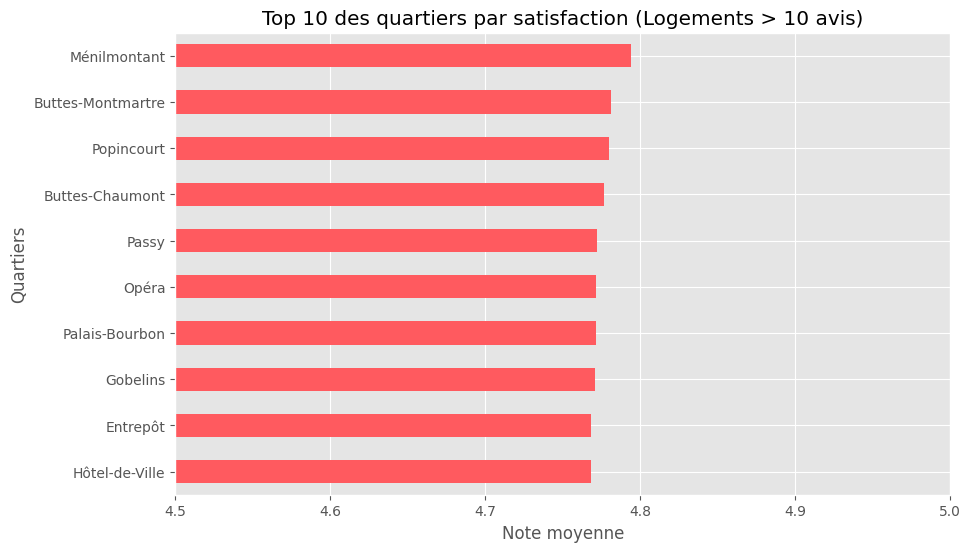

In [6]:
plt.figure(figsize=(10, 6)) 
plt.xlim(4.5, 5.0) # On zoome sur l'échelle 4.5 - 5.0 car les notes sont très proches
notes_par_quartier.tail(10).plot(kind='barh', color='#FF5A5F') 
plt.title('Top 10 des quartiers par satisfaction (Logements > 10 avis)')
plt.xlabel('Note moyenne')
plt.ylabel('Quartiers')
plt.show()

**Interprétation des résultats :**

 *  Contrairement à ce qu'on pourrait penser, **les quartiers les plus prestigieux et centraux** (Élysée, Bourse, Luxembourg) **se retrouvent en bas du classement**. Cela peut s'expliquer par **une exigence plus forte des voyageurs qui paient le prix fort** : le rapport qualité/prix y est sans doute moins intéressant.

 *  Le haut du classement est **dominé par les quartiers de l'Est et du Nord parisien** (Ménilmontant, Buttes-Chaumont, Popincourt). **Ces quartiers sont souvent moins chers et plus "vivants"**.

 *  Il est important de noter que **l'écart entre le premier et le dernier est infime** (0.06 points). Cela confirme que **le standard de qualité Airbnb à Paris est uniformément élevé**, peu importe la localisation.

### 4\.2 Visualisation Géographique (Heatmap)

*Utilisons les coordonnées GPS pour voir si les zones "bien notées" se regroupent géographiquement.*

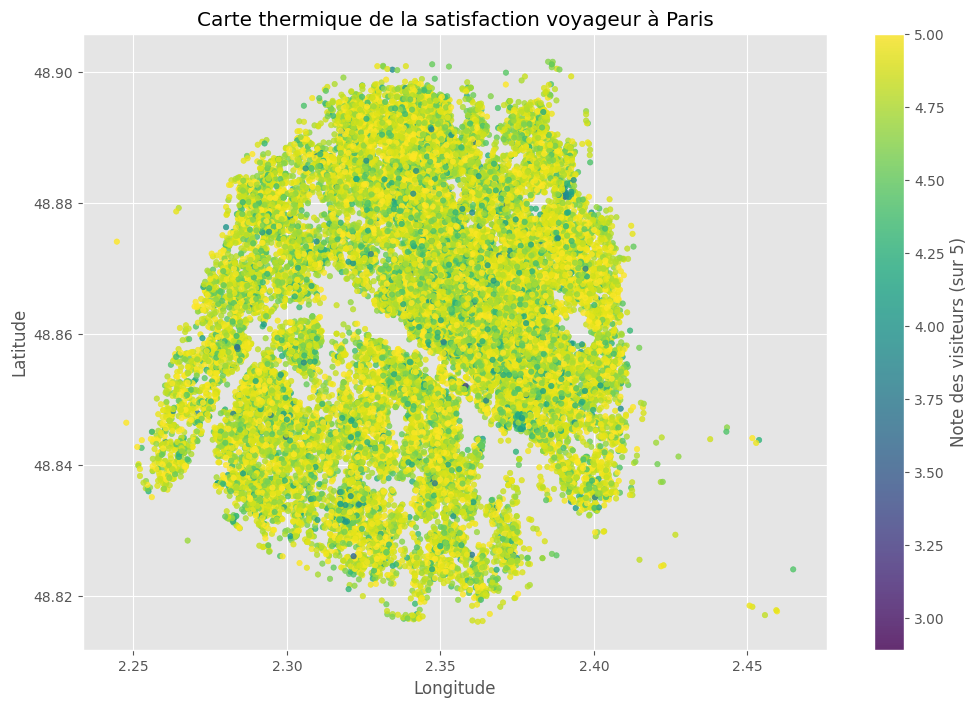

In [7]:
plt.figure(figsize=(12, 8))

# Création du nuage de points
carte = plt.scatter(x=airbnb_credible['longitude'],
                    y=airbnb_credible['latitude'],
                    c=airbnb_credible['review_scores_rating'],
                    cmap='viridis', # Palette de couleurs (Jaune = Meilleure note, Violet = Moins bonne note)
                    s=15,           # Taille des points
                    alpha=0.8)      # Transparence

cbar = plt.colorbar(carte)
cbar.set_label('Note des visiteurs (sur 5)') # Barre de légende pour comprendre les couleurs

plt.title('Carte thermique de la satisfaction voyageur à Paris')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

**Interprétation de la carte :**

* La carte est quasiment d'une seule couleur uniforme. **Cela prouve qu'il n'y a pas de fracture géographique à Paris**.

* **Ce visuel confirme ce que nous avions vu dans le classement** : avec moins de 0,1 point d'écart entre les quartiers, les différences sont invisibles à l'œil nu.

* Pour la recherche d'un logement à Paris, **la localisation (Nord, Sud, Est, Ouest) n'aura quasiment aucun impact sur la qualité de votre hébergement**. La satisfaction est élevée partout.

## Conclusion 

Au terme de cette analyse exploratoire, nous pouvons conclure que **Paris maintient un standard de qualité élevé sur la plateforme Airbnb**.

Le principal à retenir est que **le prestige du quartier ne garantit pas une meilleure note**. Au contraire, les données suggèrent une légère préférence des utilisateurs pour les quartiers plus périphériques et authentiques.

**La principale limite de notre étude est l'absence de la variable `price`**, qui nous empêche d'analyser le rapport qualité/prix. Pour approfondir l'analyse, une piste d'amélioration serait de collecter les données manquantes via un script de web scraping sur Airbnb.